# Lista 03 - ICs + Bootstrap

In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [2]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

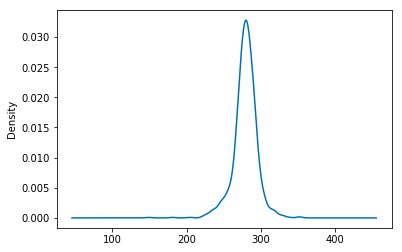

In [3]:
df['Gestational Days'].plot.density()

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [4]:
def calcula_IC_gestacao(df):
    mean = df['Gestational Days'].mean()
    std = df['Gestational Days'].std(ddof=1)
    lb = mean - 1.96 * (std / len(df) ** (1 / 2))
    ub = mean + 1.96 * (std / len(df) ** (1 / 2))
    return [lb, ub]

calcula_IC_gestacao(df)

[278.18551859376134, 280.01720713025907]

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [5]:
def resposta():
    return 3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

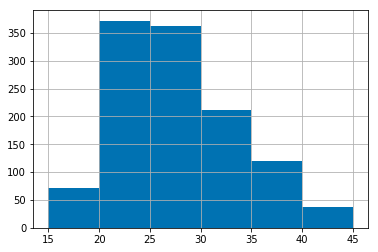

In [13]:
df['Maternal Age'].hist(bins=6)

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

(array([3909.,    0.,    0.,    0.,    0.,   83.,    0.,    0.,    0.,
        1008.]),
 array([26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. ]),
 <a list of 10 Patch objects>)

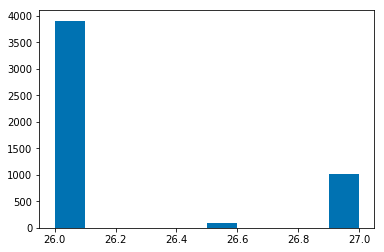

In [7]:
numero_amostras = 5000
tamanho_amostra = len(df)
amostras = []

for i in range(numero_amostras):
    amostra = df['Maternal Age'].sample(tamanho_amostra, replace=True)
    amostras.append(amostra.median())

plt.hist(amostras)

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [8]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [9]:
def ex3(dados):
    d = dados.describe()
    return [dados.mean(), dados.median(), dados.var(), dados.std()]

ex3(dados)

[19.508920875736013,
 1.0042548724785347,
 3257589.8969675843,
 1804.8794688198943]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [10]:
def ex3_IC(dados):
    mean = dados.mean()
    std = dados.std(ddof=1)
    se = std / np.sqrt(len(dados))
    return [mean - 1.96 * se, mean + 1.96 * se]

ex3_IC(dados)

[8.322162029586398, 30.69567972188563]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

(array([1.8000e+01, 1.7000e+02, 2.1030e+03, 1.7697e+04, 5.3693e+04,
        2.3227e+04, 2.7980e+03, 2.6700e+02, 2.3000e+01, 4.0000e+00]),
 array([-15.95146967, -12.46309552,  -8.97472137,  -5.48634721,
         -1.99797306,   1.4904011 ,   4.97877525,   8.46714941,
         11.95552356,  15.44389772,  18.93227187]),
 <a list of 10 Patch objects>)

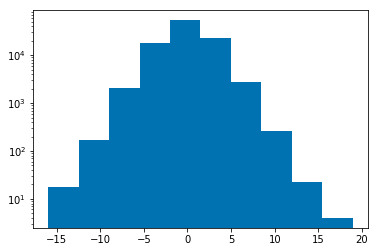

In [11]:
plt.hist(np.log2(dados), log=True)

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

YOUR ANSWER HERE